<center>
    <img width="20%" src="https://emprelatam.com/wp-content/uploads/2019/10/logos-coderhouse-01.png">
</center>

# **Entrega Final proyecto Data Science** 
### **Proyecto**: Modelo de Segmentacion de clientes para un centro comercial



Contenido

1. Abstracto con motivación y audiencia.************
2. Preguntas/Problema que buscamos resolver.******
3. Breve Análisis Exploratorio de Datos (EDA).****
4. Ingeniería de atributos.
5. Entrenamiento y Testeo.
6. Optimización.
7. Selección de modelos.

#### **Entregado por Steven Vargas**
###### *Nota*: El proeycto lo entrego solo, dado que quien era mi compañero de equipo se retiro avanzaod el curso y Fer me permitio seguir el proyecto solo y con su asesoria llevarlo al mejor termino, para no comenzar de ceros uniendome a otro equipo.


---------------------------


 ### **1. Abstracto con motivación y audiencia:**
  Descripción de alto nivel de lo que motiva a analizar los datos elegidos y audiencia que se podría beneficiar de este análisis.



## **Abstracto:**

Analizar las compras de los clientes, resulta muy importante para todas las estrategias internas de los centros comerciales, ya sea para nuevas promociones, fidelización de sus clientes, categorización de tendencias de consumo y enfoque de campañas. No es un secreto que una de las mejores medidas para retener clientes es conocer al cliente y generar un trato especial con él.Por ello, se propone un modelo sencillo de Machine Learning con Aprendizaje no supervisado, sobre una base de datos obtenida de un curso avanzado en Machine Learning de Udemy, reflejada en GitHub.


## **Audiencia:**
La audencia especifica es a los equipos de marketing del centro comercial, donde se realicen sugerencias de planeas respecto a los clientes que tienen. Adicionalmente es una fuente de informacion para desarrollares de modelos de analitica



  






_________________________________



### **2. Preguntas/Problema que buscamos resolver**

 Si bien puede haber más de una problemática a resolver, la problemática principal debe encuadrarse como un problema de clasificación o regresión.

 #### **Para meditar**: 


Todos los centros comerciales guardan información de las transacciones de sus clientes, que permite tener información relevante como edad, cuanto gasto en compras en los locales comerciales, cuáles son sus ingresos promedio, cada cuanto compra, entre otros; que le permite hacer grupos de compras entre los clientes, para así dar beneficios. El problema es cuando estas promociones se hacen por intuición o sin tener clara las tendencias reales de compra de los clientes, lo que hace que las promociones no sean igual de efectivas. para ello se busca comprender al consumidor y así planear mejor las estrategias por grupos de clientes.

#### **Preguntas de interes:**

*   ¿Cómo impactan las nuevas campañas en la agrupación de los clientes?
*   ¿Qué parámetros son los correctos para definir el tipo de cliente que tenemos?
*  ¿Cómo puedo clasificar de la mejor manera a mis clientes?
*   ¿Los clientes del centro comercial estan interesados en beneficios especailes?
*   ¿Vale la pena una estrategia de fidelizacion con los clientes actuales?
*  ¿ Se puede afirmar que crear uan estrategia de lealtad traeria beneficios para el Centro Comercial?
*  ¿ Los clientes  del centro comercial tiene caracteristicas geoespecial diferentes? ¿ Son clientes "flotantes" o locales?
* ¿ Caracterizando a los clientes actuales con metodos nos supervisados, permiten crear estrategias futuras de lso clientes con un etiquetado supervisado tipo RMF?
* ¿ A mayores ingresos del cliente, su frecuencia de consumo es mas alta?
* ¿Cual es el rango Salarial de los clientes del centro comercial?


#### **Pregunta Objetivo**

*   **¿Cual es la clasificacion ideal de los clientes del centro comercial, que le permita identificar a los clientes actuales?**

_____________________________________

 
## **3. Breve Análisis Exploratorio de Datos (EDA):**
 Análisis descriptivo de los datos mediante visualizaciones y herramientas estadísticas, análisis de valores faltantes.
 
 
 
 
 
 #### 3.1.   **Acerca del conjunto de datos**

  Analizar las compras de los clientes, resulta muy importante para todas las estrategias internas de los centros comerciales, ya sea para nuevas promociones, fidelizacion de sus clientes, categorizacion de tendencias de consumo y enfoque de campañas. por ello, se propone un modelo sencillo de Machine Learning con Aprendijzae no supervisado, sobe una base de datos compuesta principlamente de: 

  

1.   Identificación del cliente
2.   Género
3.   Años	Ingreso Anual (k$)	
4.   Puntuación de gastos (1-100)


La base de datos es optenida de un curso avanzado en MachineLearning de Udemy, reflejada en GitHub.

Fuente: https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv 




---


### **Cargar librerias**

In [21]:
# Instalamos los paquetes y librerias que queremos usar

import numpy as np # Para toda nuestra formulacion lineal
import pandas as pd # para el procesamiento de nuestra informacion
import matplotlib.pyplot as plt # Para as vistas de nuestros resultados
import seaborn as sns  # Para as vistas de nuestros resultados
# Llamamos nuestro DataSet
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
dataset = pd.read_excel('/content/Mall_Customers.xlsx')
dataset.head()

Mounted at /content/gdrive


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,19,15,39
1,2,Female,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


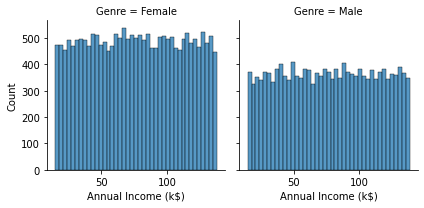

In [22]:

sns.displot(
    dataset, x="Annual Income (k$)", col="Genre",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [23]:
#total de filas y columnas en el conjunto de datos
dataset.shape

(35003, 5)

In [24]:
# de los 200 campos de celda anterior, validamos la informacion/resultado y que tipo de datos estan para nuestras 5 variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35003 entries, 0 to 35002
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              35003 non-null  int64 
 1   Genre                   35003 non-null  object
 2   Age                     35003 non-null  int64 
 3   Annual Income (k$)      35003 non-null  int64 
 4   Spending Score (1-100)  35003 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ MB


In [25]:
# de los 200 campos de celda anterior, validamos la informacion/resultado y que tipo de datos estan para nuestras 5 variables
dataset.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CustomerID,35003.0,17502.00,10104.64,1.0,8751.5,17502.0,26252.5,35003.0
Age,35003.0,38.98,12.46,18.0,28.0,39.0,50.0,70.0
Annual Income (k$),35003.0,76.15,35.33,15.0,46.0,76.0,107.0,137.0
Spending Score (1-100),35003.0,49.88,28.49,1.0,25.0,50.0,74.0,99.0


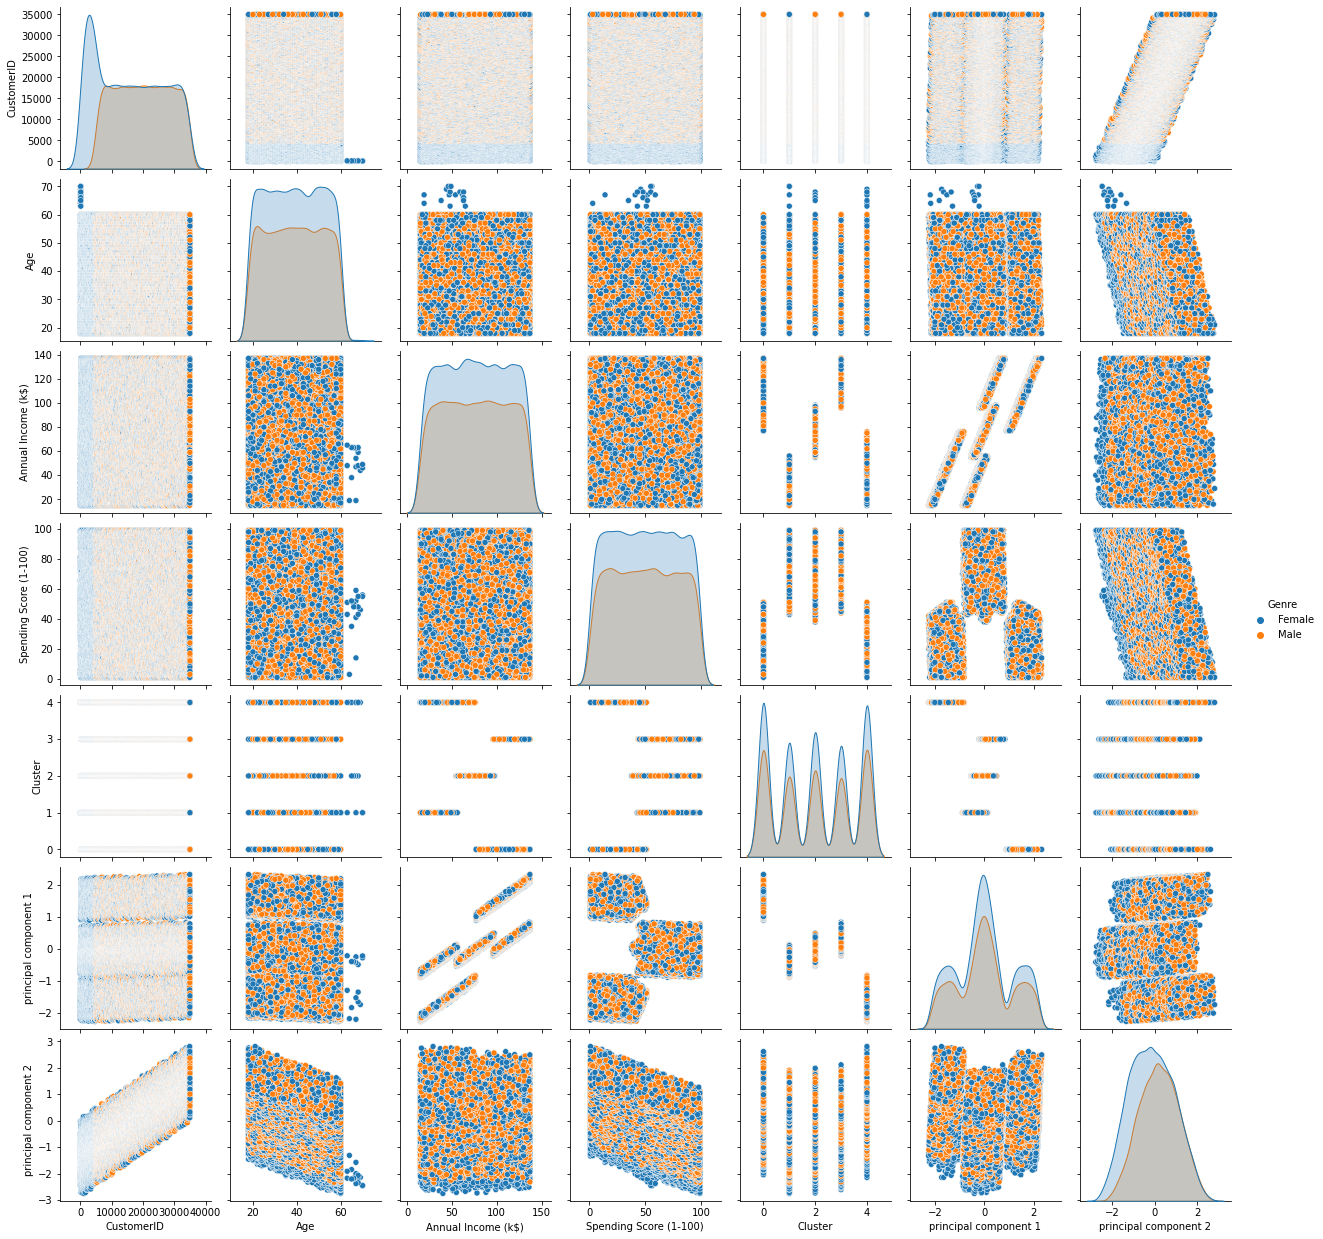

In [46]:
df = dataset
sns.pairplot(df, hue="Genre")

In [27]:
# por calidad de los datos, validamos que no existan valores nulos y si existen nos diga que valores nulos tenemos, sino los descartamos
dataset.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
# Cuando vemos los datos y los tipos de datos que tenemos, podemos decir que los ingresos de nue3stro clientes es relavante junto a su puntajes de gastos
# Asi podemos saber cuanto dinero gasta en los locales comerciales

X= dataset.iloc[:, [3,4]].values

In [29]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       ...,
       [131,  50],
       [ 81,  94],
       [103,  82]])

___________

## **3. Ingenieria de Atributos:**

## Seleccion de # de K ideal

In [30]:
from sklearn.cluster import KMeans
wcss=[]
#Aplicacion del metodo del codo
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)     # es la fórmula utilizada para segregar los puntos de datos en grupos

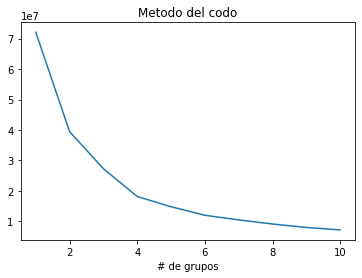

In [31]:
#Graficamos los resultados
plt.plot(range(1,11), wcss)
plt.title('Metodo del codo')
plt.xlabel('# de grupos')
plt.show()

### Interpretacion 
Podemos ver en el grafico que despues del k= 4 existen datos interesantes entre los K: 4,5 y 6. es por ello que evaluaremos los 3 K tomando solo como referencia el analisis grafico

## Algoritmo y pruebas de K

### K = 4

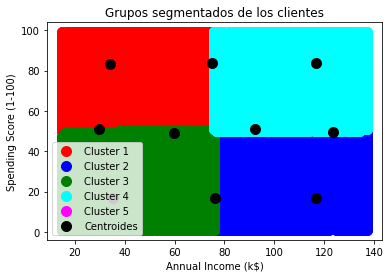

In [32]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans_4= kmeansmodel.fit_predict(X)

#Visualizacion del modelo 

plt.scatter(X[y_kmeans_4 == 0, 0], X[y_kmeans_4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_4 == 1, 0], X[y_kmeans_4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_4 == 2, 0], X[y_kmeans_4 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_4 == 3, 0], X[y_kmeans_4 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans_4 == 4, 0], X[y_kmeans_4 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroides')
plt.title('Grupos segmentados de los clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### K = 5

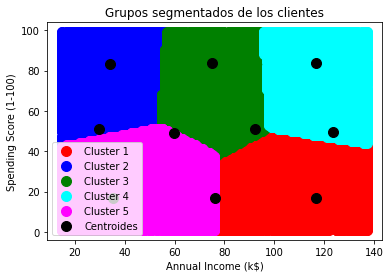

In [33]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans_5= kmeansmodel.fit_predict(X)

#Visualizacion del modelo 

plt.scatter(X[y_kmeans_5 == 0, 0], X[y_kmeans_5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_5 == 1, 0], X[y_kmeans_5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_5 == 2, 0], X[y_kmeans_5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_5 == 3, 0], X[y_kmeans_5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans_5 == 4, 0], X[y_kmeans_5 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroides')
plt.title('Grupos segmentados de los clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### K = 6

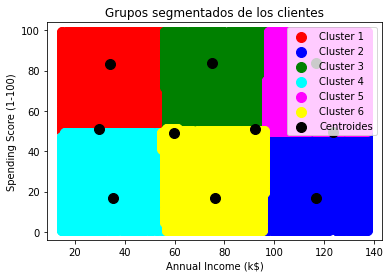

In [34]:
kmeansmodel = KMeans(n_clusters= 6, init='k-means++', random_state=0)
y_kmeans_6= kmeansmodel.fit_predict(X)

#Visualizacion del modelo 

plt.scatter(X[y_kmeans_6 == 0, 0], X[y_kmeans_6 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans_6 == 1, 0], X[y_kmeans_6 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans_6 == 2, 0], X[y_kmeans_6 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans_6 == 3, 0], X[y_kmeans_6 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans_6 == 4, 0], X[y_kmeans_6 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans_6 == 5, 0], X[y_kmeans_6 == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroides')
plt.title('Grupos segmentados de los clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **Analisis sobre los dos K ideales**

Cuando revisamos los resultados del modelo propuesto podemos ver que: 

*   Cuando vemos los resultados del K=  4:

> El grupo de clientes se divide de forma homogenea despues de los ingresos anuales de $ 76. Lo que es la media de los datos en generar en nuestra revision estadistica.

> Asi mismo, la division entre los datos en terminos del score de puntos del cliente, es similar al promedio (49.88). Cabe resaltar que los grupos por sus caracteristicas estadisticas son homogeneos. 





*  Cuando vemos los resultados del K=  5:


> El grupo de clientes se divide de una manera interesante, ya que el cluster adicional que se crea esta en la parte superior del score y en el promedio de los datos de ingresos anuales

> El grupo adicional que vemos puede ser revisado como aquellos clientes promedio con buen puntaje pero con ingresos medios. lo que permite un mejor impacto en las promociones que se crean y e la estrategia de lealtad.

> Es el mejor cluster en terminos de deseable para el cliente final.

*  Cuando vemos los resultados del K=  6:


>  Al igual que el K 4, la distribucion es homogenea pero esta tiene en cuenta criterios de cuartiles, agrupando en 4 grupos el 75% de los datos. ( 2 grupos con ganancias bajas, 2 con ganancia media  2 grupos con ganancia alta) en cada agrupacion de bajo, medio, alto estan dos grupos divididos por el promedio (49.88) de Score.

--------


Dado el analisis anterior, se propone que se use el K de 5

-----------------

In [35]:
dataset['Cluster']=y_kmeans_5
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Female,19,15,39,4
1,2,Female,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


# Variables Artificiales y aplicacion del metodo PCA

In [36]:
df_drop=dataset.drop(labels=['Genre'],axis=1)
df_drop.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,2,21,15,81,1
2,3,20,16,6,4
3,4,23,16,77,1
4,5,31,17,40,4


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x = StandardScaler().fit_transform(df_drop)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

dataset['principal component 1']=principalDf['principal component 1']
dataset['principal component 2']=principalDf['principal component 2']
dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,principal component 1,principal component 2
0,1,Female,19,15,39,4,-2.163214,-0.519073
1,2,Female,21,15,81,1,-0.786618,-1.374882
2,3,Female,20,16,6,4,-2.112878,-0.029577
3,4,Female,23,16,77,1,-0.768339,-1.372487
4,5,Female,31,17,40,4,-2.158697,-0.898268


## Validación  cruzada de plegado en K

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [39]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

y = dataset.Cluster


numeric_cols = [cname for cname in dataset.columns if dataset[cname].dtype in ['int64', 'float64']]
X = dataset[numeric_cols].copy()

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 28002, Test set:7001
Fold:2, Train set: 28002, Test set:7001
Fold:3, Train set: 28002, Test set:7001
Fold:4, Train set: 28003, Test set:7000
Fold:5, Train set: 28003, Test set:7000


In [40]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

### **4. Optimización**

### **Aplicamos** Regresión Lineal 

In [41]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-7.17707096e-25 -1.98130738e-30 -1.23231577e-24 -1.28182397e-24
 -7.72701079e-25]
rmse= 0.00


### **Aplicamos** Arboles de decision 

In [42]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0. -0. -0. -0. -0.]
rmse= -0.00


#### Aplicamos  regresor de bosque aleatorio


In [43]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [-1.21411227e-06 -7.39037280e-05 -1.52563919e-04 -4.54000000e-05
 -1.58571429e-05]
rmse= 0.01


#### Ajuste del regresor del árbol de decisión

In [44]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 1.00
For max depth: 2
rmse= 0.59
For max depth: 3
rmse= 0.31
For max depth: 4
rmse= 0.08
For max depth: 5
rmse= 0.05
For max depth: 6
rmse= 0.04
For max depth: 7
rmse= 0.02
For max depth: 8
rmse= -0.00
For max depth: 9
rmse= -0.00
For max depth: 10
rmse= -0.00


#### Ajuste de regresor de bosque aleatorio

In [45]:
estimators = [1,5,10,15,20,40,50, 100, 150, 200, 250, 300, 350,400]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 1
rmse= 0.01
For estimators: 5
rmse= 0.01
For estimators: 10
rmse= 0.01
For estimators: 15
rmse= 0.01
For estimators: 20
rmse= 0.01
For estimators: 40
rmse= 0.01
For estimators: 50
rmse= 0.01
For estimators: 100
rmse= 0.01
For estimators: 150
rmse= 0.01
For estimators: 200
rmse= 0.01
For estimators: 250
rmse= 0.01
For estimators: 300
rmse= 0.01
For estimators: 350
rmse= 0.01
For estimators: 400
rmse= 0.01


____________

## **7. Selección de modelos**

## Intrepretaciones

Como la seleccion ideal entre el PCA y el modelo de Kmeans. el modelo de Kmean arrojo los mejores resultados, usando ademas un K de 5. Podemos afirmar dentro del analisis base y los resultados de prueba lo siguiente:

#### Dentro de los resultados podemos ver:



1.   **Cluster 1**: Son los clientes que aunque ganan muy bien, gastan menos.
2.   **Cluster 2**: Gasta en promedio lo que tiene de promedio en ingresos los ah un cliente frecuente no recurrente pero con interes en comprar dado su puntaje score.
3.  **Cluster 3**: Gana mucho y gasta mucho.
4.  **Cluster 4**: Gana poco pero gasta mas. 
5.  **Cluster 5**: Gana menos y gasta menos.


-----------------------

## Conclusiones


Dentro del problema del caso, podemos afirmar que el gerente del centro comercial debe enfocar sus esfuerzos en los clientes del  Clustering 2 y Clustering 3, ya que son las personas que ganan y gastan. dado esto, podemos usar algunas de las siguientes estrategias:

Para los Clustering 2 y Clustering 3

1.   Enviar correos masivos a los clientes
2.   Enviar SMS a los clientes de campañas estacionales (dia de madres, cumpleñaos, navidad, etc) con despuestos especiales.


Para todos los Clustering


3. Estrategia de metales (RFM) que permita segmentar a los clientes como clientes (Plata, oro, bronce) en cada uno de los segmentos, esto permite tener mayor claridad en la linea de desarrollo de los clientes y poder perfilar la propension de los clientes y saber cuando se mueven entre segmentos. un ejemplo de esto es que si el cliente es Oro en el segmento 2 (Gasta en promedio lo que tiene de promedio en ingresos los ah un cliente frecuente no recurrente pero con interes en comprar dado su puntaje score.) es muy probable que se mueva al segmento 3






---

